In [134]:
import numpy as np
import pandas as pd
import os
import requests
import pprint
import matplotlib.pyplot as plt
import requests
import operator
from datetime import datetime
from dateutil import tz
import operator
from collections import OrderedDict
from math import isnan
import json
import re
from IPython.display import Image

In [135]:
def wordcloud_plot(text, colour):
    wordcloud = WordCloud(
        width = 3000,
        height = 2000,
        background_color = colour,
        stopwords = STOPWORDS).generate(str(text))

    fig = plt.figure(
        figsize = (40, 30),
        facecolor = 'k',
        edgecolor = 'k')

    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    return plt.show()

In [136]:
def clean_tweet(tweet):
    return ' '.join(re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

In [137]:
path = os.getcwd()
path += '/incindia.json'

In [138]:
tweets = ""
with open(path, 'r') as f:
    for line in f.readlines():
        tweets += line

In [139]:
data = json.loads(tweets)

In [140]:
mostLiked, likes, likeurl = 0, 0, ""
mostComment, comment, commenturl = 0, 0, ""
for post in data['GraphImages']:
    if likes < post['edge_media_preview_like']['count']:
        mostLiked = post['id']
        likeurl = post['shortcode']
        likes = post['edge_media_preview_like']['count']
    if comment < post['edge_media_to_comment']['count']:
        mostComment = post['id']
        commenturl = post['shortcode']
        comment = post['edge_media_to_comment']['count']

# Most Liked Post with screenshot

In [141]:
print("Post has the most likes' ID is: ",mostLiked)
print("Total Likes: ",likes)

Post has the most likes' ID is:  1963045050868118065
Total Likes:  47570


In [142]:
likeurl

'Bs-IxK3FTIx'

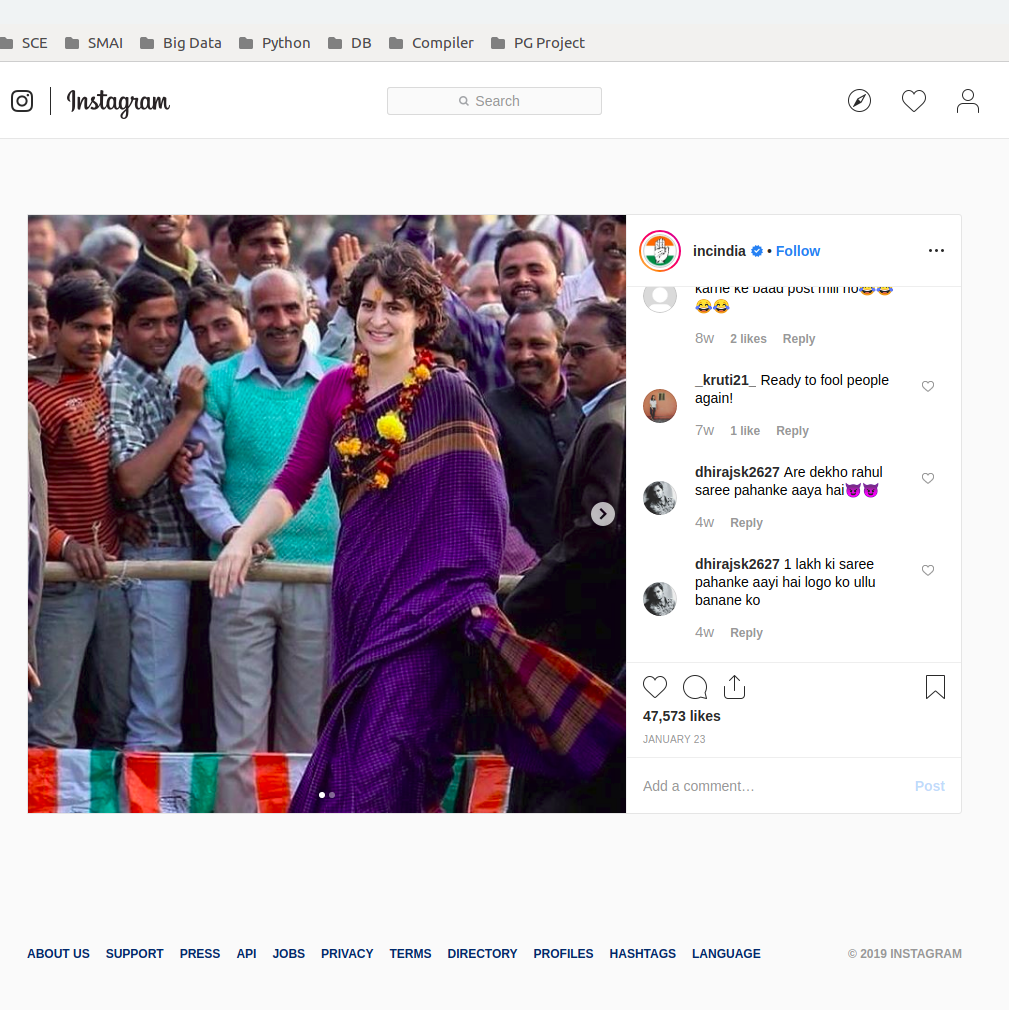

In [143]:
Image("screenshot/insta-inc1.png")

# Most commented post with screenshot

In [144]:
print("Post has the most comments' ID is: ",mostComment)
print("Total Comments: ",comment)

Post has the most comments' ID is:  1974915930053149431
Total Comments:  3908


In [145]:
commenturl

'BtoT5MoFAL3'

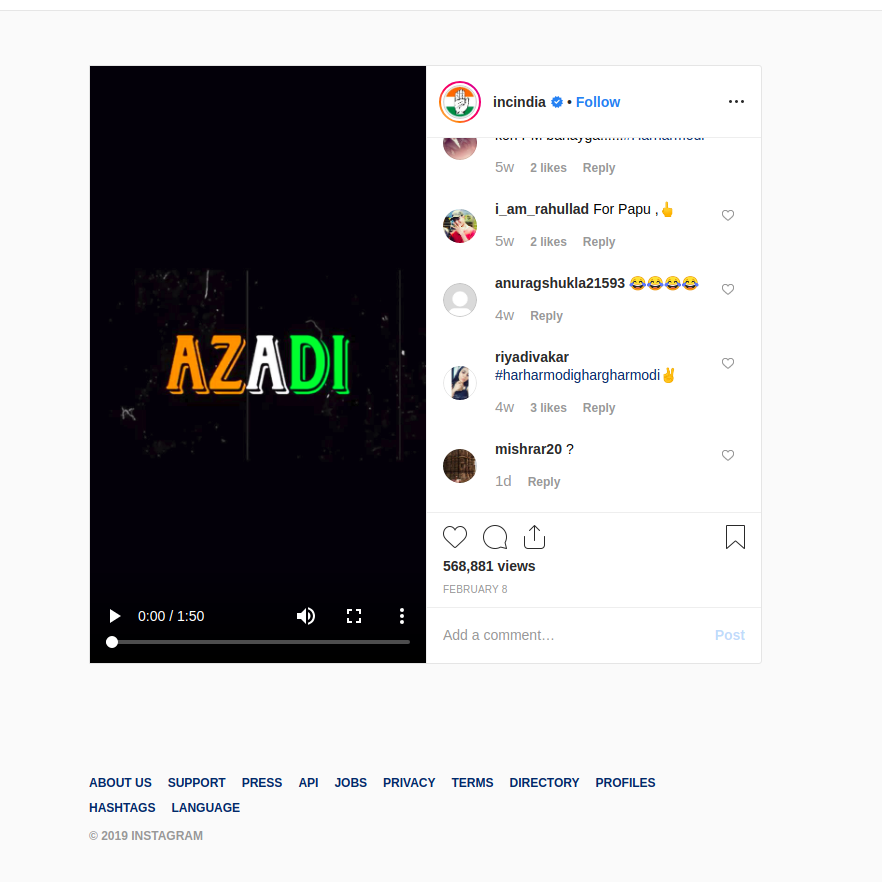

In [146]:
Image("screenshot/insta-inc2.png")

In [147]:
df = []
for post in data['GraphImages']:
    df.append([int(post['edge_media_preview_like']['count']), int(post['edge_media_to_comment']['count']), int(post['id'])])

In [148]:
df = pd.DataFrame(df, columns=['likes', 'comments', 'id'])

In [149]:
newdf = df.sort_values(['likes', 'comments'], ascending=[False, False])

# Top 5 most popular posts

In [150]:
newdf.head()

likes  comments                   id
236  47570       831  1963045050868118065
257  46399       777  1938442143921581528
70   41736       599  2008736986937322291
271  40947      1339  1932059831226895806
181  36889       489  1979965879694516621

In [151]:
hashtags = {}
for post in data['GraphImages']:
    if 'tags' in post and len(post['tags']) > 0:
        for tag in post['tags']:
            if not tag in hashtags:
                hashtags[tag] = 1
            else:
                hashtags[tag] += 1

In [152]:
sorted_x = sorted(hashtags.items(), key=operator.itemgetter(1))

# Top 5 Hashtags

In [153]:
sorted_x[len(sorted_x)-5:len(sorted_x)]

[('RahulGandhi', 23), ('NoMo', 30), (':', 30), ('India', 40), ('Congress', 75)]

# PART 2

In [176]:
import json
from wordcloud import WordCloud, STOPWORDS 

In [177]:
path = os.getcwd()
path += '/bjp4india.json'

In [178]:
tweets = ""
with open(path, 'r') as f:
    for line in f.readlines():
        tweets += line

In [179]:
data = json.loads(tweets)

In [158]:
count = 0
for post in data['GraphImages']:
    if post['is_video']:
        count += 1

In [159]:
def showPieChart(photoTweet, rest):
    slices_hours = [photoTweet, rest]
    activities = ['Photo in Tweet', 'Other']
    explode = (0.012, 0.012)
    colors = ['orange', 'coral']
    fig1, ax1 = plt.subplots()
    ax1.pie(slices_hours, explode=explode,colors=colors, labels=activities, autopct='%1.1f%%',
            shadow=True, startangle=120)
    ax1.axis('equal') 
    plt.show()

### Pie chart representing the share of images in the tweets as compared to videos

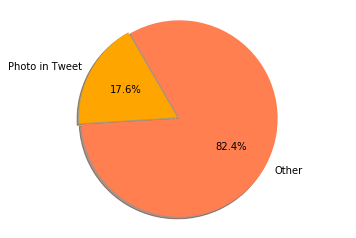

In [160]:
showPieChart(count, len(data['GraphImages'])-count)

In [161]:
df = []
for post in data['GraphImages']:
    text = post['edge_media_to_caption']['edges'][0]['node']['text']
    df.append([int(post['edge_media_preview_like']['count']), int(post['edge_media_to_comment']['count']), int(post['id']), text])

In [162]:
df = pd.DataFrame(df, columns=['likes', 'comments', 'id', 'post'])

In [163]:
newdf = df.sort_values(['likes', 'comments'], ascending=[False, False])

In [164]:
newdf.head()

likes  comments                   id  \
282  120358       996  1971654181565494688   
131  116062      2361  2001708532669233585   
202  103918      1386  1986381191931986313   
224  103607       707  1982507866222547021   
36   103350       550  2016846776457002610   

                                                  post  
282  “A lot of people ask me how my mother felt whe...  
131  Demise of Manohar Parrikar ji has left a big v...  
202  उनकी सेवा, जिनकी वजह से आज दुनिया भर में कुम्भ...  
224  PM @narendramodi was welcomed by Divyangs at K...  
36          #NaMoAgain meet in London. #IsBaarPhirModi

In [165]:
tweets = newdf['post'][0 : 200]

In [166]:
stopwords = set(STOPWORDS)
stopwords.update(['Nan','Unknown','https','co','@', 'shri'])

In [167]:
cleanTweets = []
for i in range(len(tweets)):
    cleanTweets.append(clean_tweet(str(tweets.iloc[[i]].iloc[0])))

# Wordcloud of top 200 most popular posts'

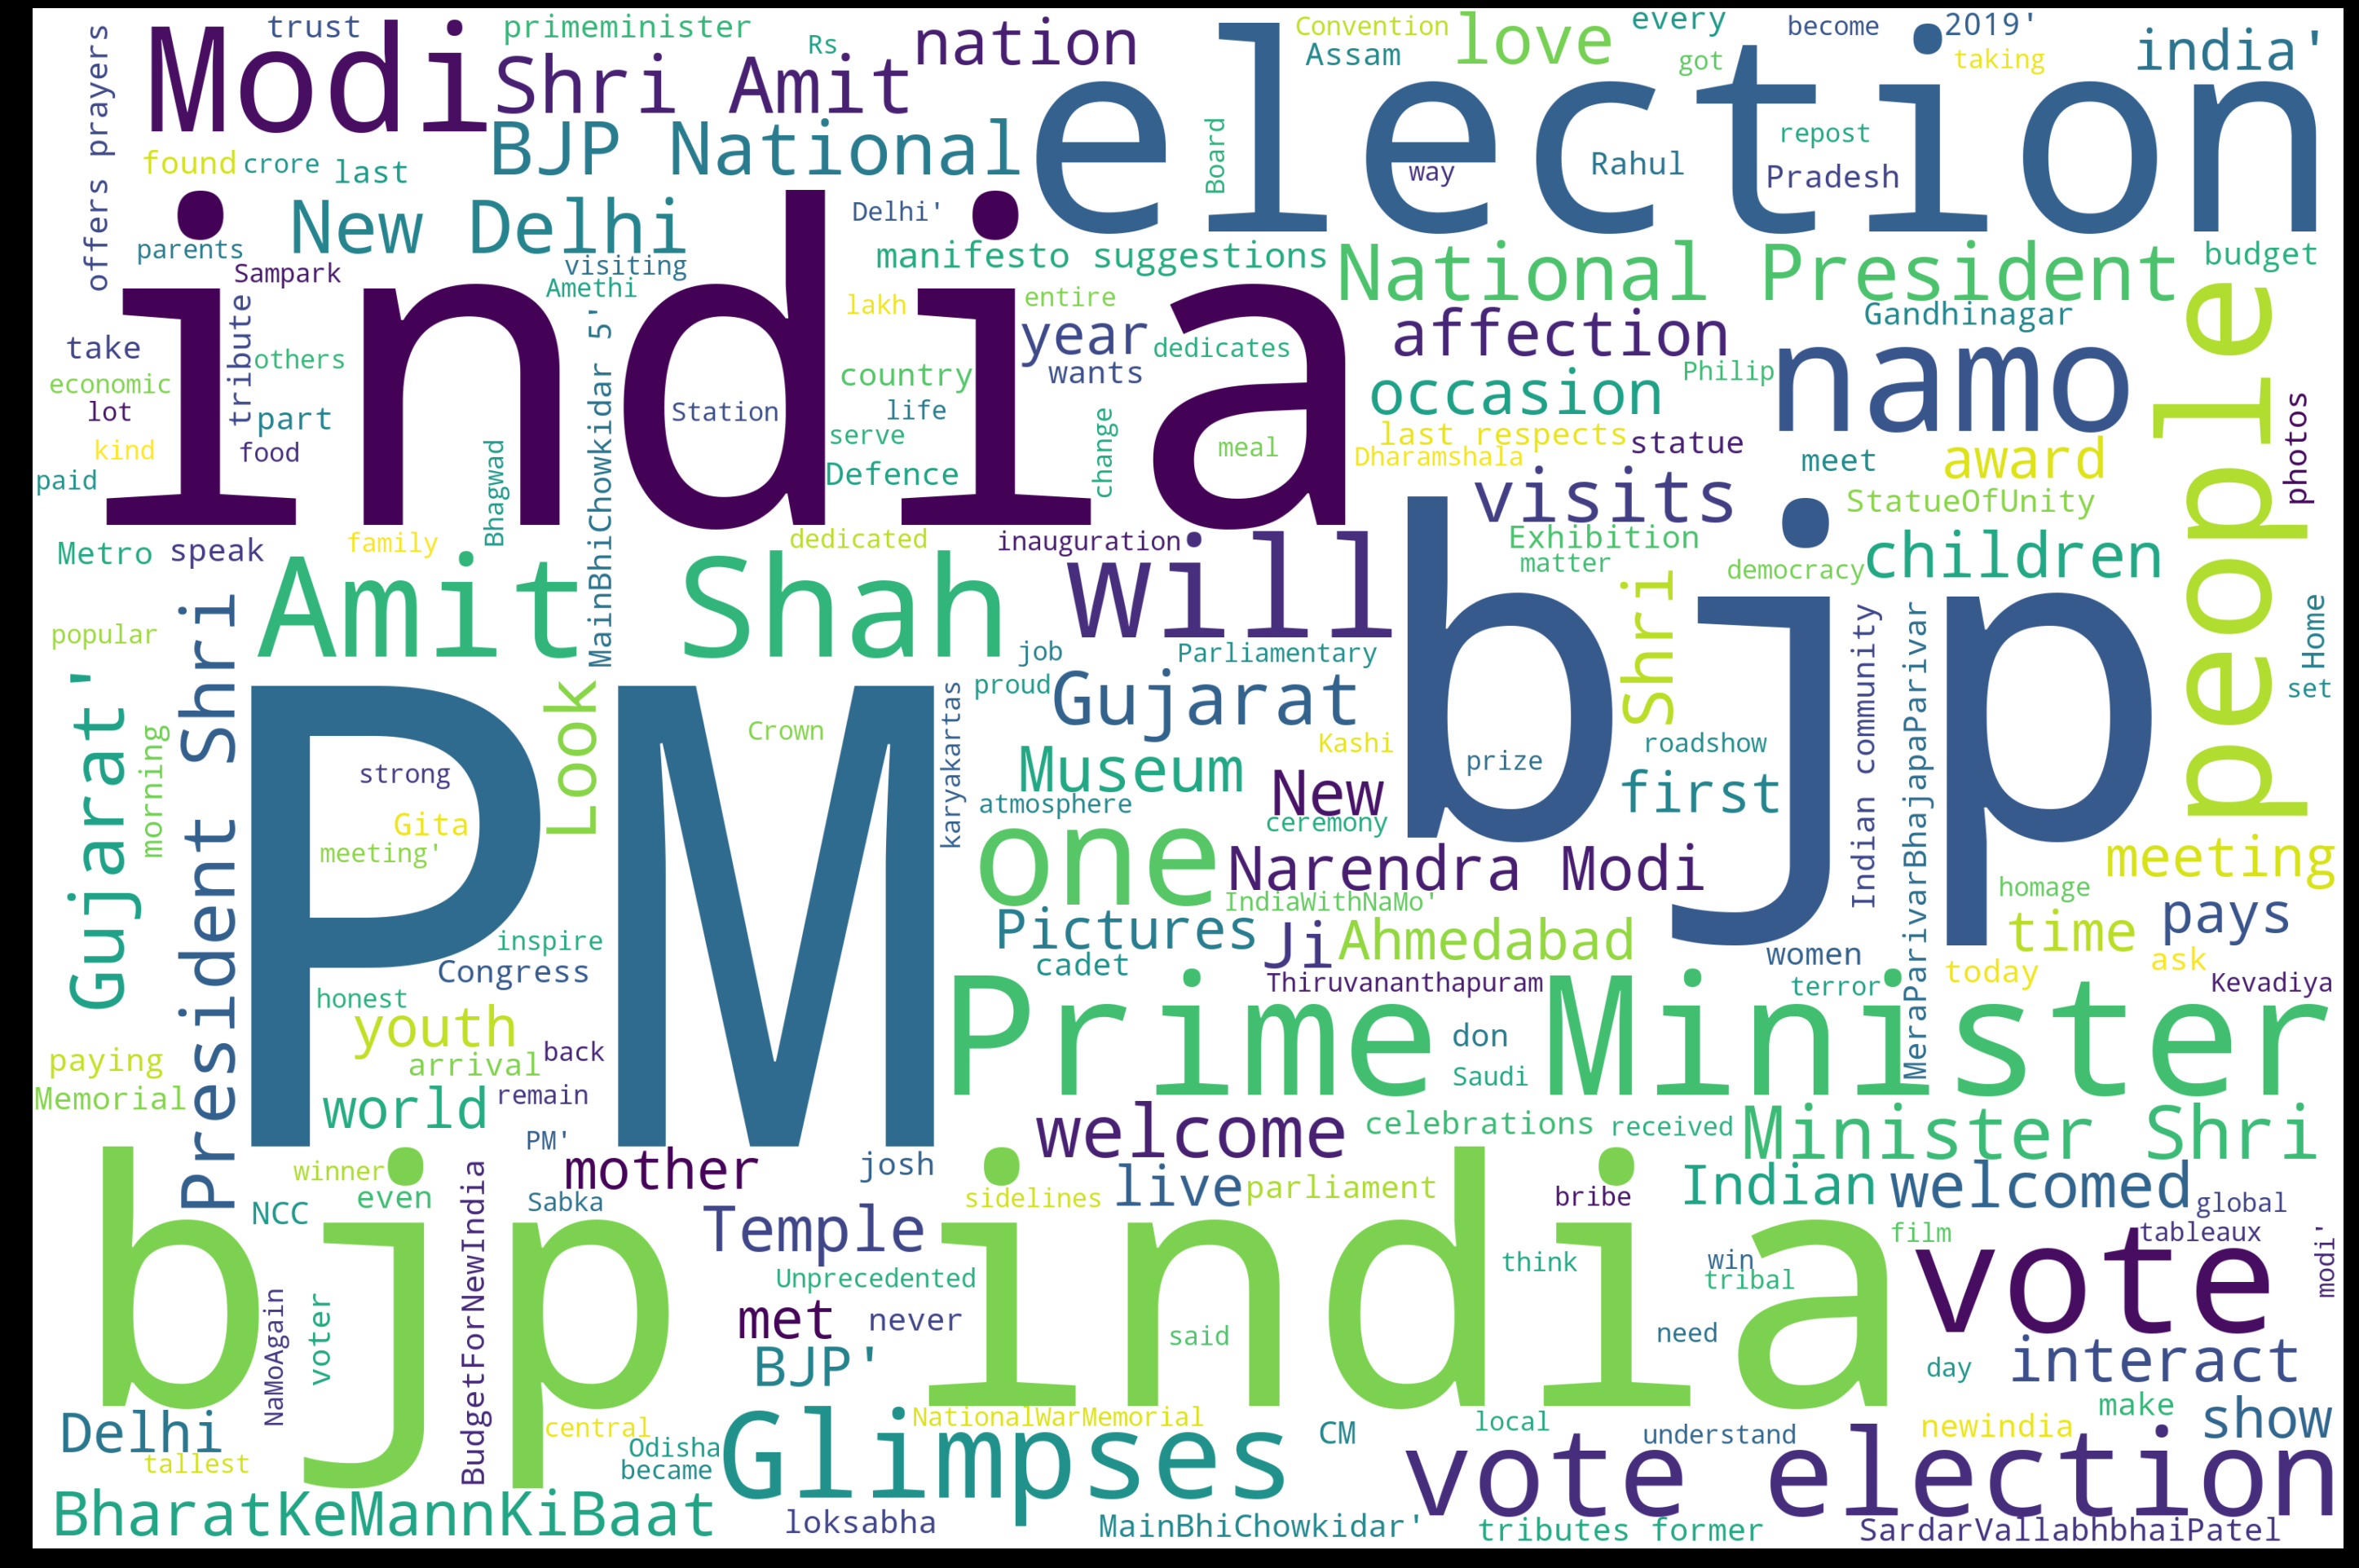

In [168]:
wordcloud_plot(cleanTweets, 'white')

# Reason
The most occuring words are:
1. PM - Current Prime Minister of India is from this party.
2. BJP - The name of the party, it is used for emphasis and glorification of the party.
3. India - The country of the party, signifies Nationalist feelings of the party.
4. Election - It's election time and Post are related to election.

In [180]:
hashtags = {}
for post in data['GraphImages']:
    if 'tags' in post and len(post['tags']) > 0:
        for tag in post['tags']:
            if not tag in hashtags:
                hashtags[tag] = 1
            else:
                hashtags[tag] += 1

In [181]:
hashtagCount = {}
for data in hashtags:
    if not type(data) is str:
        continue
    if data not in hashtagCount:
        hashtagCount[data] = 1
    else:
        hashtagCount[data] += 1

In [182]:
sorted_x = sorted(hashtags.items(), key=operator.itemgetter(1))

# Top 5 Hashtags

In [183]:
print("Top 5 Hashtags : ")
sorted_x[len(sorted_x)-5:len(sorted_x)]

Top 5 Hashtags : 


[('election', 38),
 ('BJP', 56),
 ('TransformingIndia', 59),
 ('india', 64),
 ('bjp', 79)]

# PART 3

In [184]:
path = os.getcwd()
path += '/explore_2019-04-14-05-00-26.json'

In [185]:
tweets = ""
with open(path, 'r') as f:
    for line in f.readlines():
        tweets += line

In [186]:
data = json.loads(tweets)[0]

In [187]:
df = []
for post in data['posts']:
    df.append([post['caption'], int(post['likes']['count']), int(post['views']), int(post['comments']['count']), post['url']])

In [188]:
df = pd.DataFrame(df, columns=['caption', 'likes', 'views', 'comments', 'url'])

# Data Formate

In [189]:
df.head()

caption  likes  views  comments  \
0  Live every moment at fullest..\nSmile & follow...  13781      0       332   
1  ASKER YOLU BEKLİYORUMMM.\n@jongsuk0206\nKesfet...   2176      0        31   
2  Evening atmosphere in Achim☀️\n.\n.\nShot with...    837      0        41   
3                                      flower girl 🌸   1382      0        45   
4                                                 👶🏻  17444      0       164   

                                        url  
0  https://www.instagram.com/p/BwHfpfEgJW_/  
1  https://www.instagram.com/p/BwKFszQgQXW/  
2  https://www.instagram.com/p/BwJr9rHlP8W/  
3  https://www.instagram.com/p/BwFITdXFJGH/  
4  https://www.instagram.com/p/Bv9GqY1gONK/

In [190]:
newdf = df.sort_values(['views', 'likes', 'comments'], ascending=[False, False, False])

# Top 5 Most Popular Posts with Screenshots

In [191]:
newdf.head()

caption    likes     views  comments  \
1538          1320077  12813602      1489   
1581           487161   2285581       361   
1680           276092   1442766      1609   
750            154819   1333391       361   
369            210954   1211201       697   

                                           url  
1538  https://www.instagram.com/p/BwIR_eth9Pz/  
1581  https://www.instagram.com/p/Bv8XSjtlvrS/  
1680  https://www.instagram.com/p/BwDFR9bhCjQ/  
750   https://www.instagram.com/p/BwLGu1rgT6r/  
369   https://www.instagram.com/p/BwHbWZalhSx/

In [192]:
urls = newdf['url'][0:5]

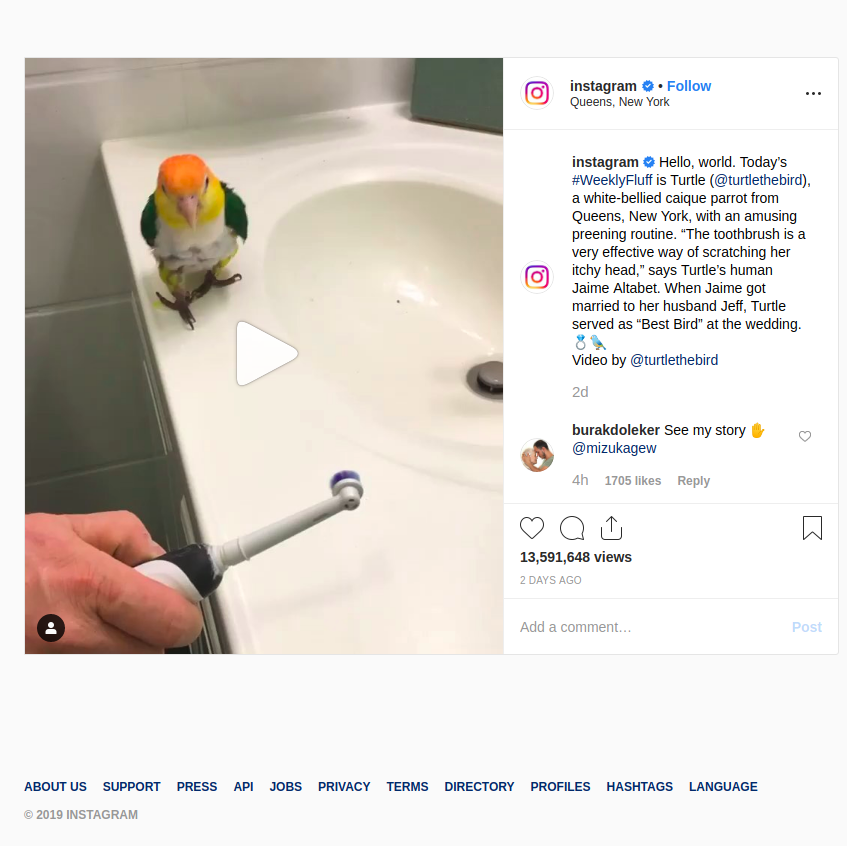

In [194]:
Image("screenshot/insta-explore1.png")

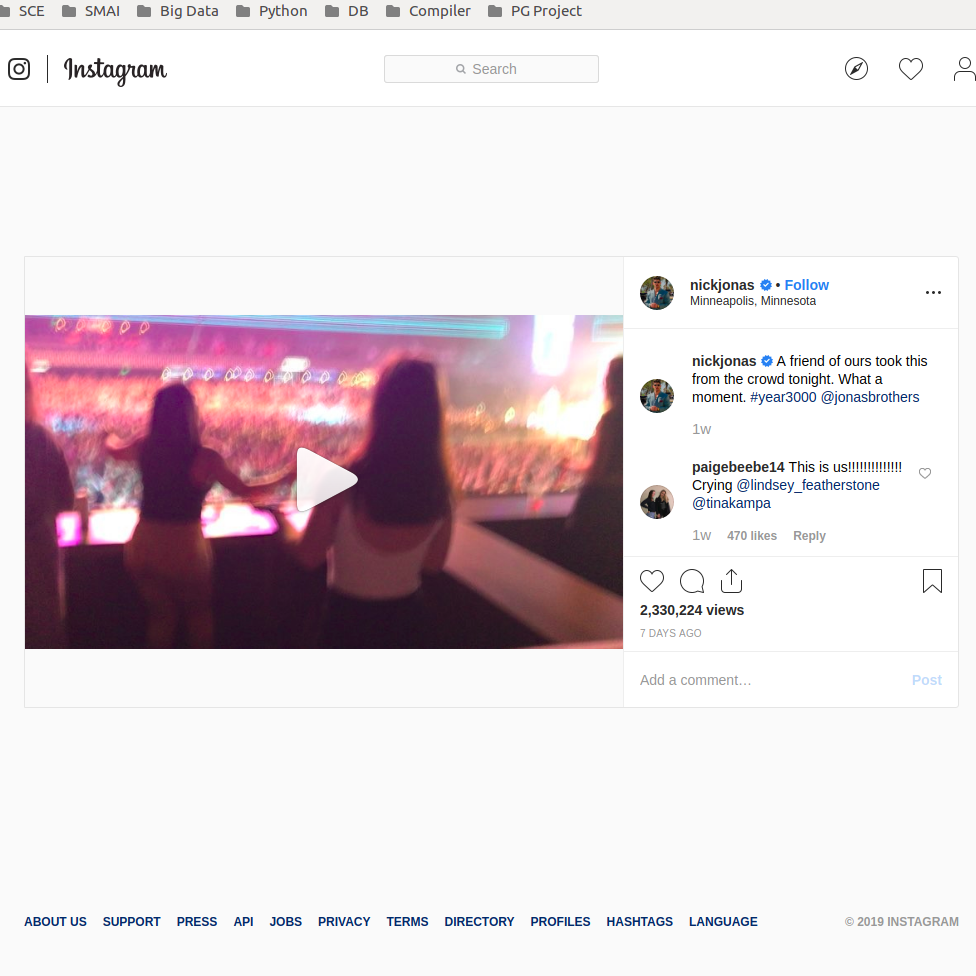

In [195]:
Image("screenshot/insta-explore2.png")

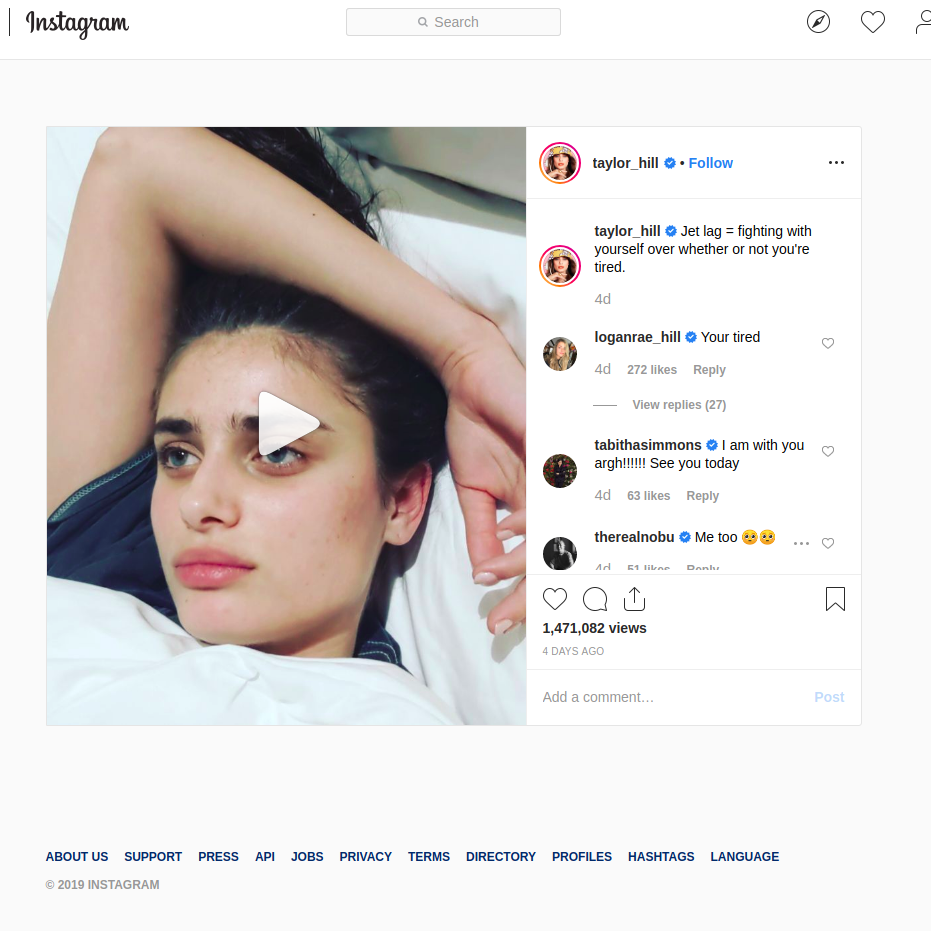

In [196]:
Image("screenshot/insta-explore3.png")

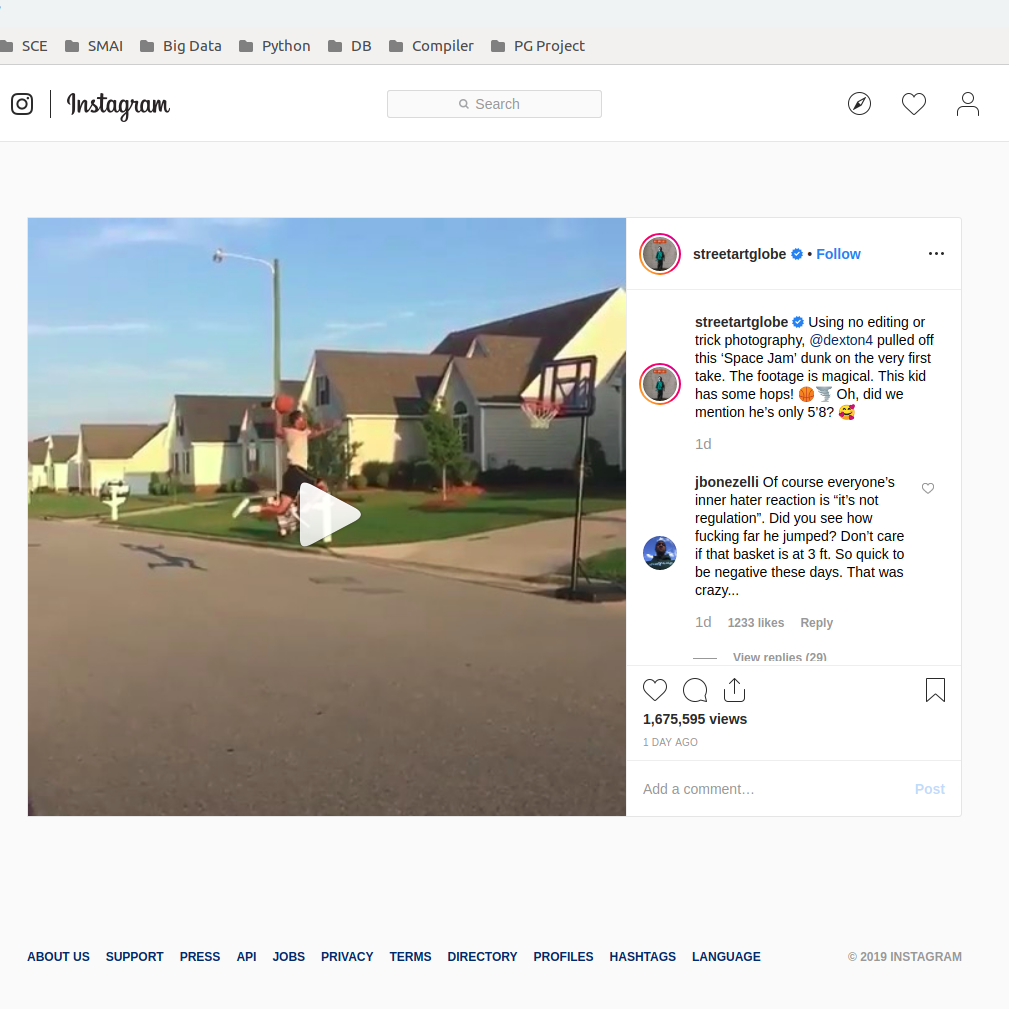

In [197]:
Image("screenshot/insta-explore4.png")

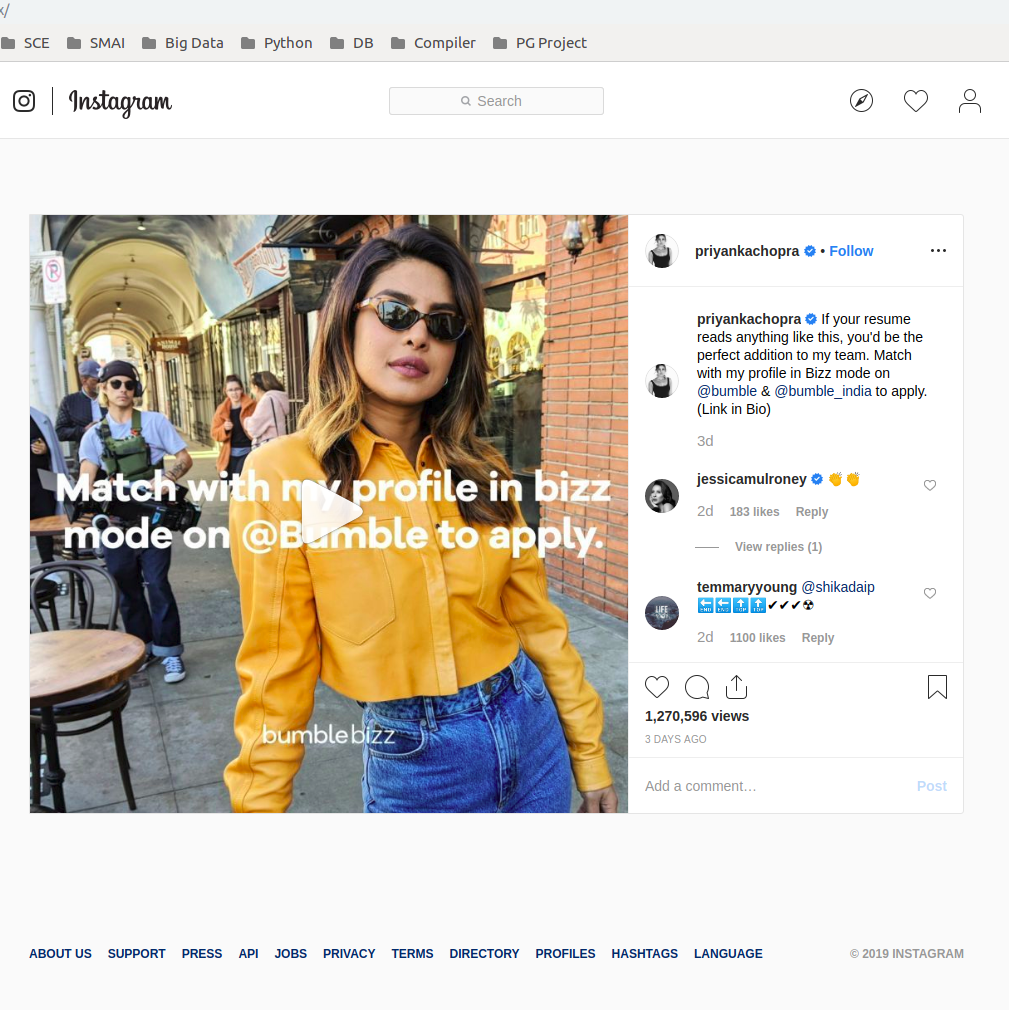

In [198]:
Image("screenshot/insta-explore5.png")

In [199]:
count = 0
for post in data['posts']:
    if len(post['imgs']) > 1:
        count += 1

In [200]:
count

255

# Pie-Chart

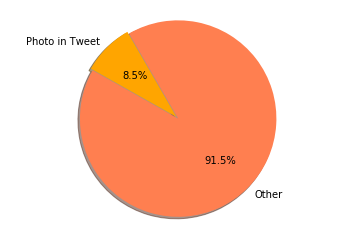

In [201]:
showPieChart(count, len(data['posts'])-count)